Grupo 03

1.   Amanda Audi
2.   Carina Dourado
3.   Ingridy Silva
4.   Larissa Sayuri Santos
5.   Meyrele Torres
6.   Victor Farias

Esse código faz os seguintes passos:

9. Análise Descritiva dos dados processados.

In [ ]:
# Bibliotecas
import pandas as pd               # manipulação de dados
import numpy as np                # manipulação de dados
import seaborn as sns             # criação de gráficos

In [ ]:
# Fazendo a conexao com o google drive (aula Mineracao)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lendo os dados
path = "XXX"
arq = "dados_processados.csv"

dados = pd.read_csv(path + arq)
dados.head()

,index,ano,data,rodada,time,tecnico,colocacao,gols,total_gols,gols_outro_time,dif_gols,derrota,empate,vitoria,der_acum_ult5,emp_acum_ult5,vit_acum_ult5,vit_acum_tot,emp_acum_tot,der_acum_tot,id_tecnico,id_tecnico_lagged,demissao,Comeco,Interino,tempo_tec
0,5896,2018,2018-04-15,1,Atlético-MG,Thiago Larghi,13.0,1.0,3.0,2.0,-1.0,1,0,0,1,0,0,0,0,1,1.0,1.0,0.0,2018-02-09,0,65 days
1,5903,2018,2018-04-22,2,Atlético-MG,Thiago Larghi,13.0,2.0,3.0,1.0,1.0,0,0,1,1,0,1,1,0,1,1.0,1.0,0.0,2018-02-09,0,72 days
2,5911,2018,2018-04-29,3,Atlético-MG,Thiago Larghi,11.0,1.0,1.0,0.0,1.0,0,0,1,1,0,2,2,0,1,1.0,1.0,0.0,2018-02-09,0,79 days
3,5921,2018,2018-05-06,4,Atlético-MG,Thiago Larghi,4.0,2.0,4.0,2.0,0.0,0,1,0,1,1,2,2,1,1,1.0,1.0,0.0,2018-02-09,0,86 days
4,5935,2018,2018-05-13,5,Atlético-MG,Thiago Larghi,6.0,2.0,3.0,1.0,1.0,0,0,1,1,1,3,3,1,1,1.0,1.0,0.0,2018-02-09,0,93 days


# Quais os técnicos mais rodados?



In [ ]:
# Numero de times por tecnico
times_tec = dados.groupby(['tecnico'], as_index = False).agg({"time": "nunique"})
times_tec = times_tec.rename({'time':'num_time'}, axis = 'columns')
times_tec = times_tec.sort_values(by = "num_time", ascending = False)
times_tec.head(5)

,tecnico,num_time
0,Abel Braga,3
22,Jair Ventura,2
47,Vágner Mancini,2
42,Rogério Ceni,2
28,Mano Menezes,2


# Quais os times que mais demitem?/Quais time tiveram mais técnicos?

In [ ]:
# Numero de tecnicos por time
tec_time = dados.groupby(['time'], as_index = False).agg({"tecnico": "nunique"})
tec_time = tec_time.rename({'tecnico':'num_tecnico'}, axis = 'columns')
tec_time = tec_time.sort_values(by = "num_tecnico", ascending = False)
tec_time.head(10)

,time,num_tecnico
1,Botafogo,10
4,Flamengo,7
7,Palmeiras,7
2,Corinthians,6
8,Sport Recife,6
0,Atlético-MG,5
3,Cruzeiro,5
6,Internacional,5
9,São Paulo,5
5,Grêmio,1


# Qual técnico ficou mais tempo?

In [ ]:
# Transformando variável tempo_tec em float
dados['tempo_tec'] = dados['tempo_tec'].str.replace (' days', '')
dados['tempo_tec'] = dados['tempo_tec'].astype(float)

In [ ]:
tempo_tec = dados.groupby(['tecnico', 'time'], as_index = False).agg({"tempo_tec": "max"}) # nunique
tempo_tec = tempo_tec.sort_values(by = "tempo_tec", ascending = False)
tempo_tec.head(10)

,tecnico,time,tempo_tec
41,Renato Gaúcho,Grêmio,1621.0
31,Mano Menezes,Cruzeiro,1105.0
38,Odair Hellmann,Internacional,695.0
23,Fábio Carille,Corinthians,514.0
21,Fernando Diniz,São Paulo,493.0
29,Luiz Felipe Scolari,Palmeiras,394.0
27,Jorge Sampaoli,Atlético-MG,354.0
18,Eduardo Coudet,Internacional,329.0
50,Vanderlei Luxemburgo,Palmeiras,304.0
49,Tiago Nunes,Corinthians,277.0


# Qual o número de dias que um técnico fica em um time?

In [ ]:
# Métricas 
metrics_list = ['min', 'mean', 'median', 'max', 'std']
tempo_tec.agg({'tempo_tec': metrics_list})

,tempo_tec
min,0.000000
mean,190.436364
median,109.000000
max,1621.000000
std,274.482190


In [ ]:
# Quantis
tempo_tec["tempo_tec"].quantile([.01, .05, .1, .25, .5, .75, .9, .95, .99])

0.01       4.86
0.05      10.00
0.10      17.40
0.25      44.00
0.50     109.00
0.75     211.00
0.90     378.00
0.95     568.30
0.99    1342.36
Name: tempo_tec, dtype: float64

In [ ]:
classes = pd.cut(x = tempo_tec.tempo_tec, 
                 bins = [0, 30, 90, 180, 360, 720, 1621], 
                 labels = ['00a01', '01a03','03a06', '06a12', '12a24', '>24'])
tempo_tec['tem_tec_classe'] = classes
tempo_tec

,tecnico,time,tempo_tec,tem_tec_classe
41,Renato Gaúcho,Grêmio,1621.0,>24
31,Mano Menezes,Cruzeiro,1105.0,>24
38,Odair Hellmann,Internacional,695.0,12a24
23,Fábio Carille,Corinthians,514.0,12a24
21,Fernando Diniz,São Paulo,493.0,12a24
29,Luiz Felipe Scolari,Palmeiras,394.0,12a24
27,Jorge Sampaoli,Atlético-MG,354.0,06a12
18,Eduardo Coudet,Internacional,329.0,06a12
50,Vanderlei Luxemburgo,Palmeiras,304.0,06a12
49,Tiago Nunes,Corinthians,277.0,06a12


In [ ]:
import altair as alt              
alt.Chart(tempo_tec).mark_bar().encode(
        alt.X('tem_tec_classe',
          title = 'Permanência do técnico (em meses)',
          #bin = alt.Bin(extent = [0, 100], step = 2)
          ),
        alt.Y('count()',
          title = 'Frequência'))

alt.Chart(...)

# Qual o número de dias que um técnico fica em um time POR TIME?

In [ ]:
#tempo = tempo_tec.replace("days", "")
tempo_time = tempo_tec.groupby('time').agg({"tempo_tec":['min','mean', 'max']}).round(2)
tempo_time#.sort_values(by = "min")

tempo_tec                 
                    min     mean     max
time                                    
Atlético-MG        43.0   177.00   354.0
Botafogo           10.0    84.89   232.0
Corinthians        34.0   192.67   514.0
Cruzeiro            9.0   305.25  1105.0
Flamengo           15.0   113.14   178.0
Grêmio           1621.0  1621.00  1621.0
Internacional      10.0   238.00   695.0
Palmeiras           0.0   166.57   394.0
Sport Recife       39.0   120.83   190.0
São Paulo          20.0   190.80   493.0

# Há relação entre a demissão de um técnico e o tempo que ele está no time?

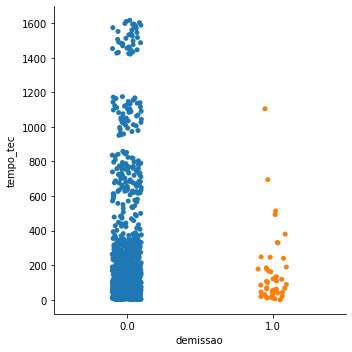

In [ ]:
import seaborn as sns         
sns.catplot(data = tempo_tecnico,
            x = 'demissao',
            y = 'tempo_tec')

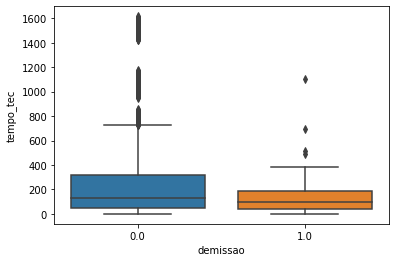

In [ ]:
from matplotlib import pyplot as plt
ax = sns.boxplot(x = "demissao", 
                 y = "tempo_tec", 
                 #col = "demissao",
                 data = tempo_tecnico)  # RUN PLOT   
plt.show()
plt.clf()
plt.close()

# Há relação entre a demissão de um técnico e o número de derrotas acumuladas no campeonato (total)?

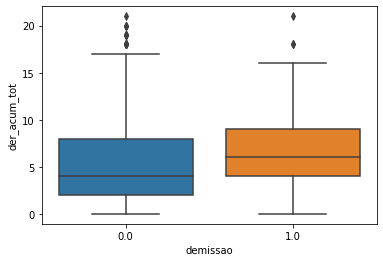

In [ ]:
from matplotlib import pyplot as plt
ax = sns.boxplot(x = "demissao", 
                 y = "der_acum_tot", 
                 #col = "demissao",
                 data = dados)  # RUN PLOT   
plt.show()
plt.clf()
plt.close()

In [ ]:
metrics_list = ['min', 'mean', 'median', 'max', 'std']
dados.query('demissao == 0').agg({'der_acum_tot': metrics_list})

,der_acum_tot
min,0.000000
mean,5.298908
median,4.000000
max,21.000000
std,4.281012


In [ ]:
dados.query('demissao == 1').agg({'der_acum_tot': metrics_list})

,der_acum_tot
min,0.000000
mean,7.255319
median,6.000000
max,21.000000
std,4.932008


# Há relação entre a demissão de um técnico e o número de derrotas nos últimos 5 jogos?

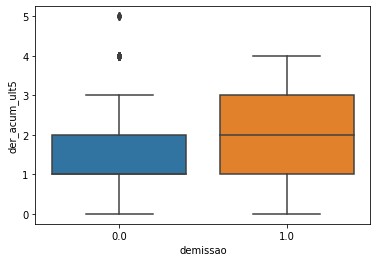

In [ ]:
ax = sns.boxplot(x = "demissao", 
                 y = "der_acum_ult5", 
                 #col = "demissao",
                 data = dados)  # RUN PLOT   
plt.show()
plt.clf()
plt.close()

In [ ]:
metrics_list = ['min', 'mean', 'median', 'max', 'std']
dados.query('demissao == 0').agg({'der_acum_ult5': metrics_list})

,der_acum_ult5
min,0.000000
mean,1.355511
median,1.000000
max,5.000000
std,1.114127


In [ ]:
dados.query('demissao == 1').agg({'der_acum_ult5': metrics_list})

,der_acum_ult5
min,0.000000
mean,1.978723
median,2.000000
max,4.000000
std,0.966602
